<a href="https://colab.research.google.com/github/EvanPandu/TugasPDS/blob/main/Tugas2PDS_H071221057_EvanPandu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# memuat data
data = pd.read_csv("diabetes_data.csv")
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# memilih data yang dibutuhkan
X = data.iloc[:,0:20]  #independent colums
y = data.iloc[:,-1]    # target colum i.e price range

In [ ]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs         Score
13              PhysHlth  55929.053254
17              Diabetes  35346.000000
4                    BMI  10312.875795
12              MentHlth   9491.555258
0                    Age   5204.869946
11               GenHlth   5133.529630
16                HighBP   4491.799960
14              DiffWalk   3926.865331
2               HighChol   2804.501278
6   HeartDiseaseorAttack   2695.401378


In [ ]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [ ]:
# memuat data
data = pd.read_csv("diabetes_data.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [ ]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[8.63827872e-03 6.21633483e-04 1.76826481e-02 1.01154514e-03
 4.52473921e-03 5.20074645e-04 7.44358825e-03 2.06213016e-03
 4.02406512e-04 3.81693343e-04 1.11525872e-03 2.80193990e-02
 7.54427702e-04 3.16784271e-03 1.43956475e-02 6.67218534e-04
 5.09210054e-02 8.57670463e-01]


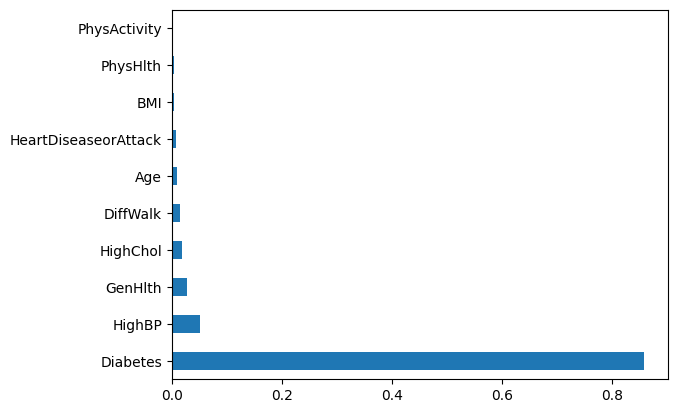

In [ ]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# memuat data
data = pd.read_csv("diabetes_data.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [ ]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr(numeric_only=True)
top_corr_features = corrmat.index

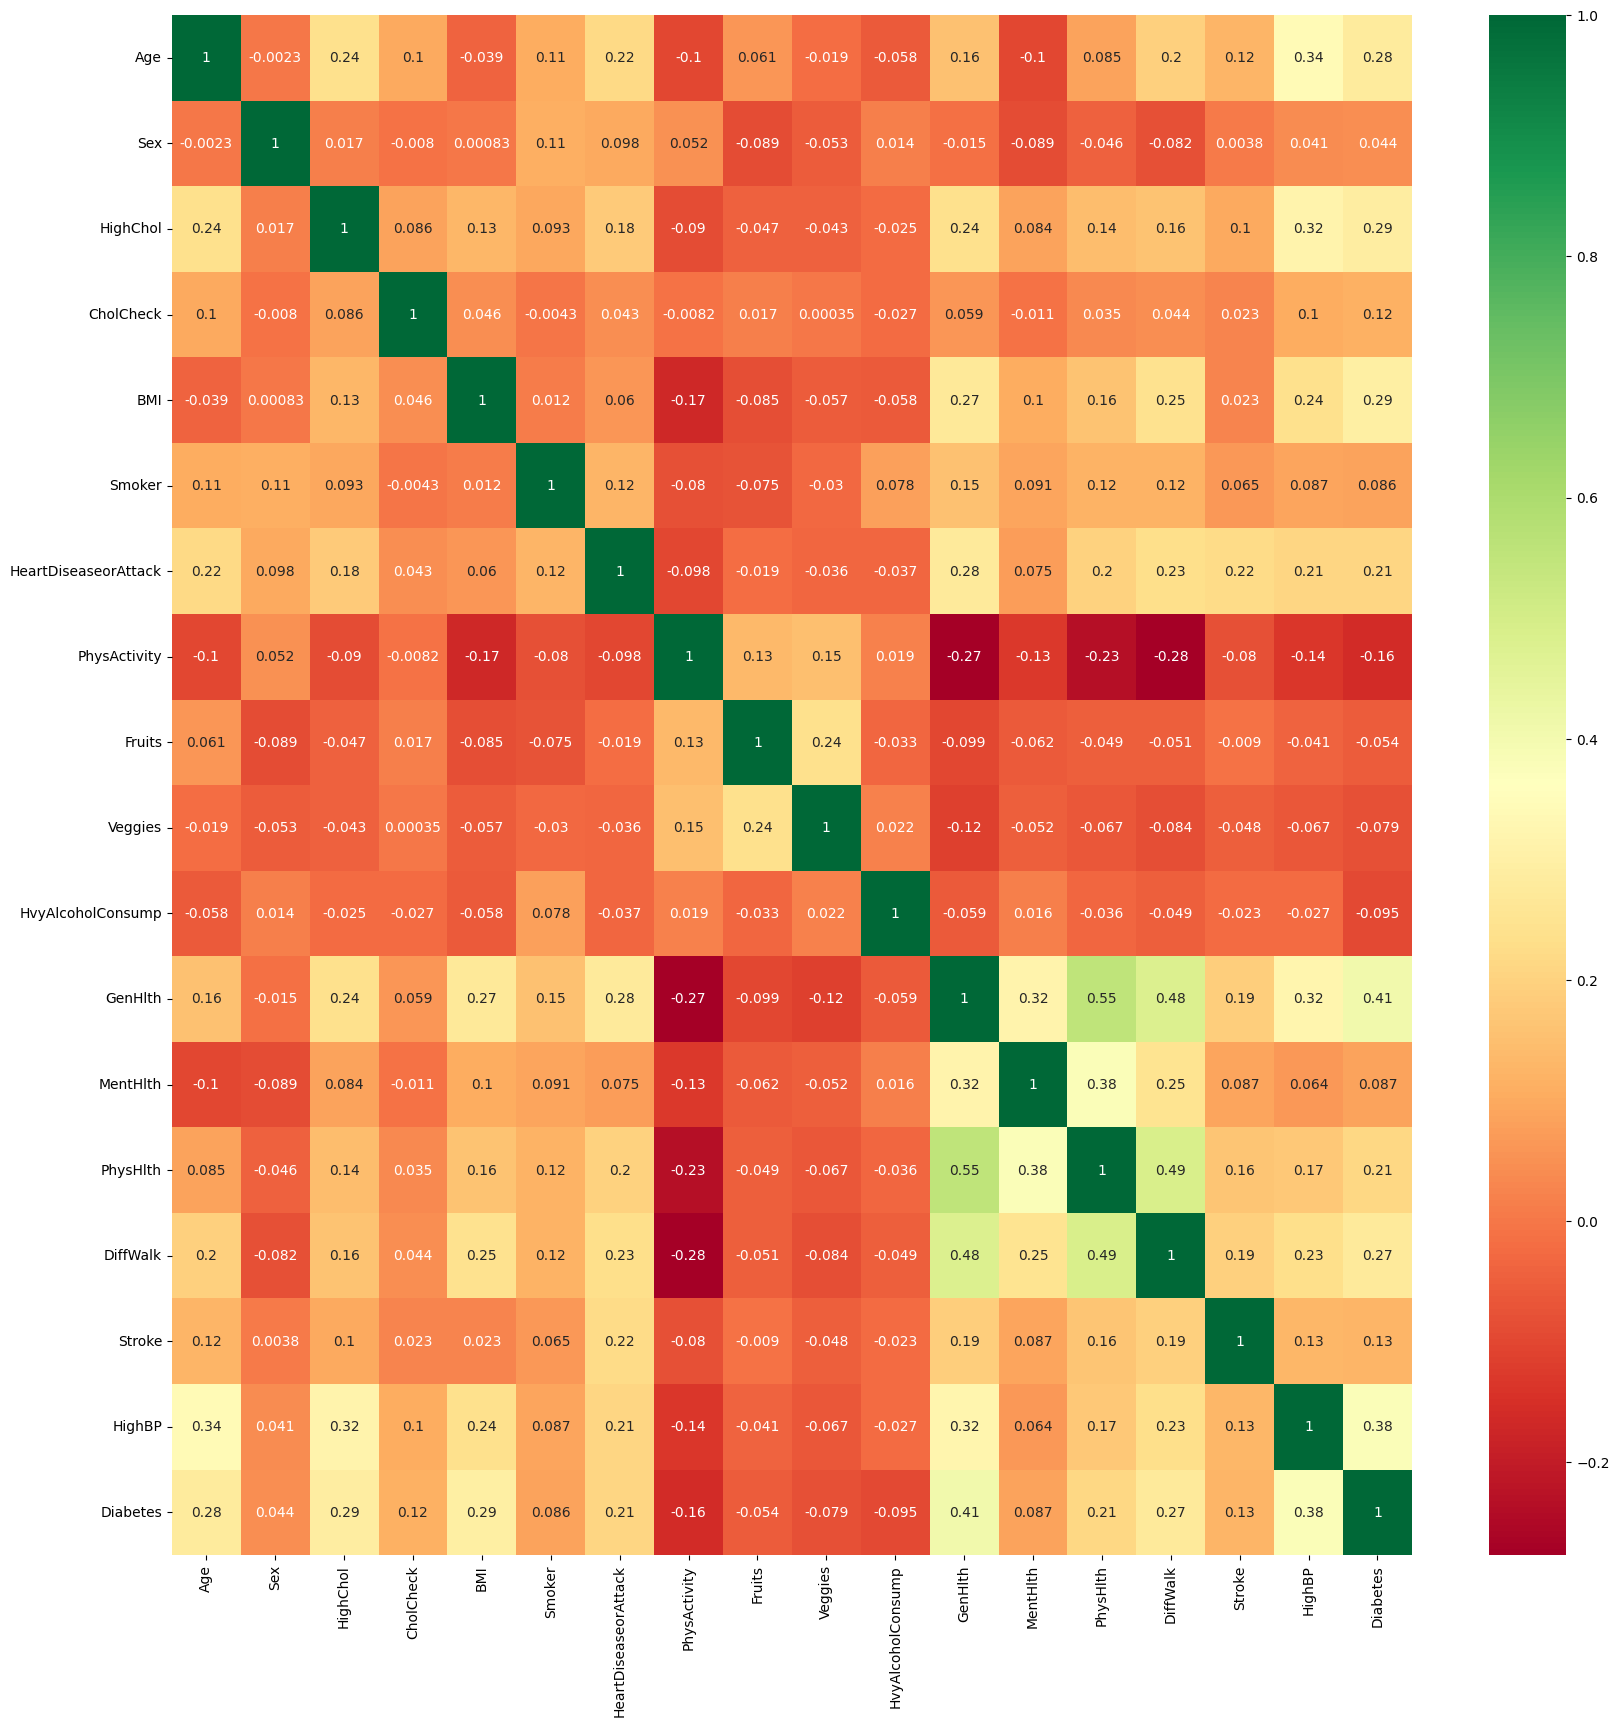

In [ ]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Kesimpulan

lihat pada baris terakhir yaitu diabetes, korelasi antara diabetes dengan MentHllth ada relasi kuat dan berkorelasi lemah dengan phyActivity